In [2]:
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 253.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 3.5 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 8.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 3.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 4.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from file
df = pd.read_csv('pods.csv')
df = df.loc[df['namespace'] == 'social-network'].reset_index(drop=True)
# df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms') 
min_cpu_time = df['cpu_timestamp'].min()
df['cpu_timestamp'] = df['cpu_timestamp'] - min_cpu_time

min_memory_time = df['memory_timestamp'].min()
df['memory_timestamp'] = df['memory_timestamp'] - min_memory_time

In [8]:
df

,namespace,pod,cpu,cpu_timestamp,memory,memory_timestamp
0,social-network,compose-post-service-866f6d7b74-hl962,0.051141,8683,2789376.0,8683
1,social-network,home-timeline-redis-7994f7cb85-d89c9,1.865080,14332,6705152.0,14332
2,social-network,home-timeline-service-bbc9bdd7b-cndcg,0.053775,11521,3219456.0,11521
3,social-network,jaeger-7455bdbc47-jchjt,0.355132,8847,43249664.0,8847
4,social-network,media-frontend-7f4999dcd-n64xn,10.584037,10527,40767488.0,10527
...,...,...,...,...,...,...
1237,social-network,user-mongodb-86bb4559d-nmlch,6.366421,242671,164519936.0,242671
1238,social-network,user-service-74685b9465-8qlhb,0.076000,250015,7380992.0,250015
1239,social-network,user-timeline-mongodb-687f6576fb-m94rm,6.422464,248925,78282752.0,248925
1240,social-network,user-timeline-redis-6bf758cc4f-5mndw,2.140983,245819,6709248.0,245819


In [9]:
df["timestamp"]

KeyError: 'timestamp'

In [10]:
pods = df['pod'].unique()

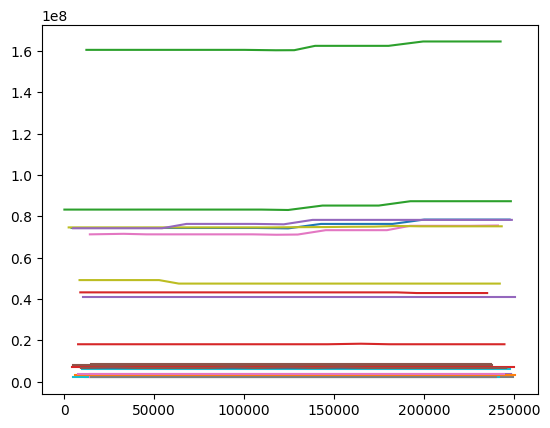

In [11]:
for pod in pods:
    df_pod = df.loc[df['pod'] == pod]
    plt.plot(df_pod['memory_timestamp'], df_pod['memory'], label=pod)

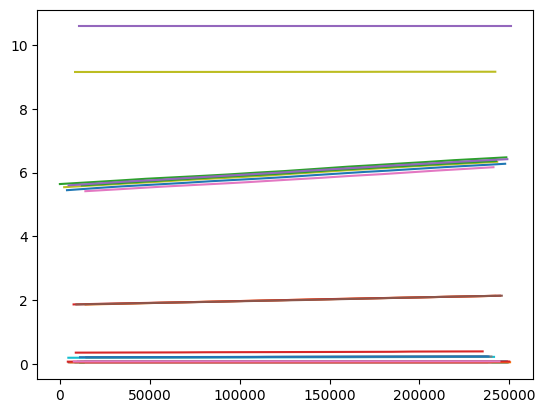

In [12]:
for pod in pods:
    df_pod = df.loc[df['pod'] == pod]
    plt.plot(df_pod['cpu_timestamp'], df_pod['cpu'], label=pod)